In [14]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from joblib import dump
import time
import matplotlib.pyplot as plt
from joblib import load
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Coalating datasets

x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')

In [3]:
# Set parameters
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.1, 1, 10], 'degree':[2,3,4]}

In [4]:
# Optimise the hyperparameters by grid search
svc = SVC(random_state=0)
gs = GridSearchCV(svc, parameters, cv=10, refit=True)

start = time.time()

gs.fit(x_train, y_train.values.ravel())

end = time.time()

In [5]:
print(f"Runtime of the program is {end - start}")

Runtime of the program is 6.310313701629639


In [6]:
# See the best score and the parameters
print(gs.best_score_, gs.best_params_)

0.7672955974842767 {'C': 0.1, 'degree': 2, 'kernel': 'poly'}


In [7]:
# See the score of the best model on the train set
gs.score(x_train,y_train)

0.7802607076350093

In [8]:
# Save the optimised model as a file
dump(gs, 'SVM_optimised.joblib')

['SVM_optimised.joblib']

In [18]:
# Visualise the results of Cross Validation
results = pd.DataFrame(gs.cv_results_)
results = results[['param_C','param_degree','param_kernel','mean_test_score']]
results.columns = ['C','degree','kernel','score']
results

,C,degree,kernel,score
0,0.1,2,linear,0.649965
1,0.1,2,rbf,0.729839
2,0.1,2,poly,0.767296
3,0.1,3,linear,0.649965
4,0.1,3,rbf,0.729839
5,0.1,3,poly,0.759748
6,0.1,4,linear,0.649965
7,0.1,4,rbf,0.729839
8,0.1,4,poly,0.742977
9,1,2,linear,0.761635


# Modelling on a SVC Testing set

In [11]:
# import files
svc = load('SVM_optimised.joblib')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

In [12]:
# See the score of the best model on the test set
svc.score(x_test,y_test)

0.7922077922077922

C:\Users\rahem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


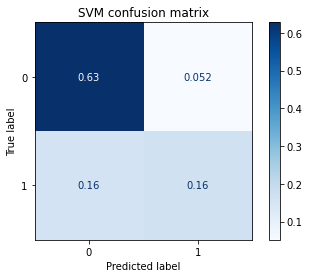

In [15]:
# Plot normalized confusion matrix
disp = plot_confusion_matrix(svc, x_test, y_test, cmap=plt.cm.Blues, normalize='all')
disp.ax_.set_title('SVM confusion matrix')
plt.show()

In [16]:
# See precision, recall and F1 score
precision,recall,f,support = precision_recall_fscore_support(y_test, svc.predict(x_test))
print('precision',precision,'\nrecall',recall,'\nF1',f,'\nsupport',support)

precision [0.80110497 0.76      ] 
recall [0.92356688 0.51351351] 
F1 [0.85798817 0.61290323] 
support [157  74]


C:\Users\rahem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


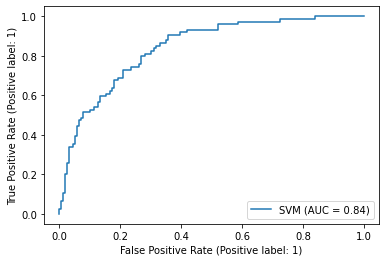

In [17]:
# Visualise ROC curve
metrics.plot_roc_curve(svc, x_test, y_test, name='SVM')
plt.show()